In [27]:
ls

20151201.txt
20151208.txt
classification_CV.ipynb
classification.ipynb
CSV_CICIDS/
CV_CICIDS.ipynb
CV.ipynb
CV_NSL.ipynb
Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
FridayCICIDS.csv*
Friday-WorkingHours-Morning.pcap_ISCX.csv*
KDD_Classification.ipynb
kddcup_corrected.csv
kddcup.data.corrected.csv
KDDTrain+.csv
NUSW-NB15_features.csv
RNN.ipynb
UNSW-NB15.csv
UNSW_NB15_testing-set.csv
UNSW_NB15_training-set.csv
UNSW_NB15_training-set_selected.csv
Untitled1.ipynb
Untitled.ipynb
Wednesday-workingHours.pcap_ISCX.csv*


In [28]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

In [29]:
def train_split(data):
    X_train=data.drop(['class.'], axis=1)
    y_train=data['class.']
    return X_train,y_train

data_train = pd.read_csv('./kddcup_corrected.csv')
data_train.replace({'smurf.': 'DOS', 'normal.': 'Normal', 'neptune.': 'DOS', 'snmpgetattack.': 'R2L',
                    'mailbomb.': 'DOS', 'guess_passwd.': 'R2L', 'snmpguess.': 'R2L', 'satan.': 'Probe',
                    'warezmaster.': 'R2L', 'back.': 'DOS', 'mscan.': 'Probe', 'apache2.': 'DOS', 'processtable.': 'DOS', 
                    'saint.': 'Probe', 'portsweep.': 'Probe', 'ipsweep.': 'Probe', 'httptunnel.': 'R2L', 'pod.': 'DOS', 
                    'nmap.': 'Probe', 'buffer_overflow.': 'U2R', 'multihop.': 'R2L', 'named.': 'R2L', 'sendmail.': 'R2L',
                    'ps.': 'U2R', 'xterm.': 'U2R', 'rootkit.': 'U2R', 'teardrop.': 'DOS', 'xlock.': 'R2L', 'land.': 'DOS',
                    'xsnoop.': 'R2L', 'ftp_write.': 'R2L', 'phf.': 'R2L', 'udpstorm.': 'DOS', 'perl.': 'U2R', 
                    'loadmodule.': 'U2R', 'worm.': 'DOS', 'sqlattack.': 'U2R', 'imap.': 'R2L'}, inplace=True)

X_train,Y_train = train_split(data_train)


In [30]:
def train_split_b(data):
    X_train_b=data.drop(['class.'], axis=1)
    y_train_b=data['class.']
    return X_train_b,y_train_b

data_train_b = pd.read_csv('./kddcup_corrected.csv')
data_train_b.replace({'smurf.': 1, 'normal.': 0, 'neptune.': 1, 'snmpgetattack.': 1,
                    'mailbomb.': 1, 'guess_passwd.': 1, 'snmpguess.': 1, 'satan.': 1,
                    'warezmaster.': 1, 'back.': 1, 'mscan.': 1, 'apache2.': 1, 'processtable.': 1, 
                    'saint.': 1, 'portsweep.': 1, 'ipsweep.': 1, 'httptunnel.': 1, 'pod.': 1, 
                    'nmap.': 1, 'buffer_overflow.': 1, 'multihop.': 1, 'named.': 1, 'sendmail.': 1,
                    'ps.': 1, 'xterm.': 1, 'rootkit.': 1, 'teardrop.': 1, 'xlock.': 1, 'land.': 1,
                    'xsnoop.': 1, 'ftp_write.': 1, 'phf.': 1, 'udpstorm.': 1, 'perl.': 1, 
                    'loadmodule.': 1, 'worm.': 1, 'sqlattack.': 1, 'imap.': 1}, inplace=True)

X_train_b,Y_train_b = train_split_b(data_train_b)
#X_test,Y_test = train_split(data_test)

#print(Counter(Y))

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print(Counter(Y_train_b))
print(Counter(Y_train))
#print(Counter(Y_test))

Counter({1: 250436, 0: 60593})
Counter({'DOS': 229855, 'Normal': 60593, 'R2L': 16345, 'Probe': 4166, 'U2R': 70})


In [31]:
from sklearn.preprocessing import OneHotEncoder

X1 = X_train.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe = pd.DataFrame(ohe.fit_transform(X1).toarray())

print(X1_ohe.shape)

X2 = X_train.select_dtypes(exclude=['object'])
sc = StandardScaler()
X2_sc = pd.DataFrame(sc.fit_transform(X2))
print(X2_sc.shape)

X_train_sc1 = pd.concat([X1_ohe,X2_sc], axis=1, sort=False)
print(X_train_sc1.shape)

X1_b = X_train_b.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe_b = pd.DataFrame(ohe.fit_transform(X1_b).toarray())

print(X1_ohe_b.shape)

X2_b = X_train_b.select_dtypes(exclude=['object'])
sc_b = StandardScaler()
X2_sc_b = pd.DataFrame(sc_b.fit_transform(X2_b))
print(X2_sc_b.shape)

X_train_sc1_b = pd.concat([X1_ohe_b,X2_sc_b], axis=1, sort=False)
print(X_train_sc1_b.shape)

encoder = LabelEncoder()
Y_train_1 = encoder.fit_transform(Y_train)

Y_train_1_b = Y_train_b
X_train_sc1=X_train_sc1.to_numpy()
X_train_sc1_b=X_train_sc1_b.to_numpy()

(311029, 79)
(311029, 38)
(311029, 117)
(311029, 79)
(311029, 38)
(311029, 117)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_RF_b=0
precision_RF_b=0
fpr_RF_b=0
precision_soe_RF=[0]*5
recall_soe_RF=[0]*5
precision_soe_RF_b=[0]*2
recall_soe_RF_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]
     
    param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
    randomForest_clf = RandomForestClassifier()
    grid_search = GridSearchCV(randomForest_clf, param_grid, cv=10, scoring='neg_mean_squared_error')
    print('Multi class classiffication')
    print(Counter(Y_train_en))
    print(Counter(Y_test_en))
    grid_search.fit(X_train_sc, Y_train_en)
    clf1 = grid_search.best_estimator_
    print("train accuracy: ", accuracy_score(Y_train_en, clf1.predict(X_train_sc)))
    start = time. time()
    y_pred_RF = clf1.predict(X_test_sc)
    end = time. time()
    RF_time=end - start
    print("Time MC: ",RF_time)
    accuracy_means_score_RF=accuracy_score(Y_test_en, y_pred_RF)
    precision_score_RF=precision_score(Y_test_en, y_pred_RF, average=None)
    recall_score_RF=recall_score(Y_test_en, y_pred_RF, average=None)
    precision_mean_score_RF=precision_score(Y_test_en, y_pred_RF, average="micro")
    print("test average accuracy: ",accuracy_means_score_RF )
    print("test precision: ", precision_score_RF)
    print("test micro-average precision: ",precision_mean_score_RF )
    print("test recall: ",recall_score_RF )
    
    print('Binary classiffication')
    print(Counter(Y_train_en_b))
    print(Counter(Y_test_en_b))
    param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
    randomForest_clf_b = RandomForestClassifier()
    grid_search_b  = GridSearchCV(randomForest_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf1_b = grid_search_b.best_estimator_
    print("train accuracy: ", accuracy_score(Y_train_en_b, clf1_b.predict(X_train_sc_b)))
    start = time. time()
    y_pred_RF_b = clf1_b.predict(X_test_sc_b)
    end = time. time()
    RF_time_b=end - start
    accuracy_score_RF_b=accuracy_score(Y_test_en_b, y_pred_RF_b)
    precision_score_RF_b=precision_score(Y_test_en_b, y_pred_RF_b, average=None)
    recall_score_RF_b=recall_score(Y_test_en_b, y_pred_RF_b, average=None)
    print("test average accuracy: ",accuracy_score_RF_b )
    print("test precision: ", precision_score_RF_b)
    print("test recall: ",recall_score_RF_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_RF_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_RF_b +=accuracy_score_RF_b
    precision_RF_b +=pr
    fpr_RF_b +=fpr
    precision_soe_RF+=precision_score_RF*100/cv
    recall_soe_RF+=recall_score_RF*100/cv
    precision_soe_RF_b+=precision_score_RF_b*100/cv
    recall_soe_RF_b+=recall_score_RF_b*100/cv
    
print("test accuracy average: ",accuracy_RF_b*100/cv )
print("test precision average: ", precision_RF_b*100/cv)
print("test false positive rate average: ",fpr_RF_b*100/cv )

TRAIN: [231629 162039  23110 ...  10305 253511   5989] TEST: [155776  82114 114047 ... 128263 186543 228882]
Multi class classiffication
Counter({0: 206869, 1: 54534, 3: 14711, 2: 3749, 4: 63})
Counter({0: 22986, 1: 6059, 3: 1634, 2: 417, 4: 7})
train accuracy:  0.9816415767024143
Time MC:  1.437394142150879
test average accuracy:  0.9806449538629715
test precision:  [0.99986948 0.95213647 1.         0.8135899  1.        ]
test micro-average precision:  0.9806449538629715
test recall:  [0.99982598 0.94883644 0.98321343 0.82802938 1.        ]
Binary classiffication
Counter({1: 225392, 0: 54534})
Counter({1: 25044, 0: 6059})


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_DT_b=0
precision_DT_b=0
fpr_DT_b=0
precision_soe_DT=[0]*5
recall_soe_DT=[0]*5
precision_soe_DT_b=[0]*2
recall_soe_DT_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
    tree_clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf4 = grid_search.best_estimator_
    y_pred_DT = clf4.predict(X_test_sc)
    end = time. time()
    DT_time=end - start
    print("time: ",DT_time)
    accuracy_score_DT=accuracy_score(Y_test_en, y_pred_DT)
    precision_score_DT= precision_score(Y_test_en, y_pred_DT, average=None)
    recall_score_DT=recall_score(Y_test_en, y_pred_DT, average=None)
    precision_mean_score_DT=precision_score(Y_test_en, y_pred_DT, average="micro")
    print("test accuracy: ", accuracy_score_DT)
    print("test precision: ",precision_score_DT)
    print("test  micro-average precision: ", precision_mean_score_DT)
    print("test recall: ", recall_score_DT)
   
    print('Binary classiffication')
    start = time. time()
    param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
    tree_clf_b = DecisionTreeClassifier()
    grid_search_b = GridSearchCV(tree_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf4_b = grid_search_b.best_estimator_
    y_pred_DT_b = clf4_b.predict(X_test_sc_b)
    end = time. time()
    DT_time_b=end - start
    print("time: ",DT_time_b)
    accuracy_score_DT_b=accuracy_score(Y_test_en_b, y_pred_DT_b)
    precision_score_DT_b= precision_score(Y_test_en_b, y_pred_DT_b, average=None)
    recall_score_DT_b=recall_score(Y_test_en_b, y_pred_DT_b, average=None)
    print("test accuracy: ", accuracy_score_DT_b)
    print("test precision: ",precision_score_DT_b)
    print("test recall: ", recall_score_DT_b)
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_DT_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_DT_b +=accuracy_score_DT_b
    precision_DT_b +=pr
    fpr_DT_b +=fpr
    precision_soe_DT+=precision_score_DT*100/cv
    recall_soe_DT+=recall_score_DT*100/cv
    precision_soe_DT_b+=precision_score_DT_b*100/cv
    recall_soe_DT_b+=recall_score_DT_b*100/cv
    
print("test accuracy average: ",accuracy_DT_b*100/cv )
print("test precision average: ", precision_DT_b*100/cv)
print("test false positive rate average: ",fpr_DT_b*100/cv )

TRAIN: [231629 162039  23110 ...  10305 253511   5989] TEST: [155776  82114 114047 ... 128263 186543 228882]
Multi class classiffication
time:  165.0195529460907
test accuracy:  0.9803877439475291
test precision:  [0.99969551 0.95242042 0.995086   0.81283743 0.75      ]
test  micro-average precision:  0.9803877439475291
test recall:  [0.99982598 0.94817627 0.97122302 0.82925337 0.85714286]
Binary classiffication
time:  148.66973519325256
test accuracy:  0.9806771051024017
test precision:  [0.95227047 0.98751446]
test recall:  [0.94834131 0.98850024]
tn:  5746 fp:  313 fn:  288 tp:  24756
fpr:  0.05165868955273147 pr:  0.9875144600901512
TRAIN: [ 55902   7601  52554 ... 129597 182392 229308] TEST: [256152  93962 233362 ... 217553  32325 269217]
Multi class classiffication
time:  170.378014087677
test accuracy:  0.9800340803137961
test precision:  [0.99991298 0.95349225 0.99514563 0.80211392 0.85714286]
test  micro-average precision:  0.9800340803137961
test recall:  [0.99973897 0.944050

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_G_b=0
precision_G_b=0
fpr_G_b=0
precision_soe_G=[0]*5
recall_soe_G=[0]*5
precision_soe_G_b=[0]*2
recall_soe_G_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    gnb_clf = GaussianNB()
    param_grid = {}
    grid_search = GridSearchCV(gnb_clf, param_grid,cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf6 = grid_search.best_estimator_
    y_pred_G = clf6.predict(X_test_sc)
    end = time. time()
    NB_time=end - start
    accuracy_score_NB=accuracy_score(Y_test_en, y_pred_G)
    precision_score_NB=precision_score(Y_test_en, y_pred_G, average=None)
    recall_score_NB=recall_score(Y_test_en, y_pred_G, average=None)
    precision_mean_score_NB=precision_score(Y_test_en, y_pred_G, average="micro")
    print("train accuracy: ", accuracy_score(Y_train_en, clf6.predict(X_train_sc)))
    print("test accuracy: ",accuracy_score_NB )
    print("test precision: ",precision_score_NB)
    print("test  micro-average precision: ", precision_mean_score_NB)
    print("test recall: ",recall_score_NB )
    
    print('Binary classiffication')
    start = time. time()
    gnb_clf_b = GaussianNB()
    param_grid = {}
    grid_search_b = GridSearchCV(gnb_clf_b, param_grid,cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf6_b = grid_search_b.best_estimator_
    y_pred_G_b = clf6_b.predict(X_test_sc_b)
    end = time. time()
    NB_time_b=end - start
    accuracy_score_NB_b=accuracy_score(Y_test_en_b, y_pred_G_b)
    precision_score_NB_b=precision_score(Y_test_en_b, y_pred_G_b, average=None)
    recall_score_NB_b=recall_score(Y_test_en_b, y_pred_G_b, average=None)
    print("train accuracy: ", accuracy_score(Y_train_en_b, clf6_b.predict(X_train_sc_b)))
    print("test accuracy: ",accuracy_score_NB_b )
    print("test precision: ",precision_score_NB_b)
    print("test recall: ",recall_score_NB_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_G_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_G_b +=accuracy_score_NB_b
    precision_G_b +=pr
    fpr_G_b +=fpr
    precision_soe_G+=precision_score_NB*100/cv
    recall_soe_G+=recall_score_NB*100/cv
    precision_soe_G_b+=precision_score_NB_b*100/cv
    recall_soe_G_b+=recall_score_NB_b*100/cv
    
print("test accuracy average: ",accuracy_G_b*100/cv )
print("test precision average: ", precision_G_b*100/cv)
print("test false positive rate average: ",fpr_G_b*100/cv )

Counter({1: 45332, 0: 37000})


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_KNN_b=0
precision_KNN_b=0
fpr_KNN_b=0
precision_soe_KNN=[0]*5
recall_soe_KNN=[0]*5
precision_soe_KNN_b=[0]*2
recall_soe_KNN_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
    knn_clf = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf5 = grid_search.best_estimator_
    start = time. time()
    y_pred_KNN = clf5.predict(X_test_sc)
    KNN_time=end - start
    accuracy_score_KNN=accuracy_score(Y_test_en, y_pred_KNN)
    precision_score_KNN=precision_score(Y_test_en, y_pred_KNN, average=None)
    recall_score_KNN=recall_score(Y_test_en, y_pred_KNN, average=None)
    precision_mean_score_KNN=precision_score(Y_test_en, y_pred_KNN, average="micro")
    print("time: ",KNN_time)
    print("test accuracy: ", accuracy_score_KNN)
    print("test precision: ",precision_score_KNN )
    print("test  micro-average precision: ", precision_mean_score_KNN)
    print("test recall: ",recall_score_KNN )
    
    print('Binary classiffication')
    start = time. time()
    param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
    knn_clf_b = KNeighborsClassifier()
    grid_search_b = GridSearchCV(knn_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf5_b = grid_search_b.best_estimator_
    y_pred_KNN_b = clf5_b.predict(X_test_sc_b)
    end = time. time()
    KNN_time_b=end - start
    print("time: ",KNN_time_b)
    accuracy_score_KNN_b=accuracy_score(Y_test_en_b, y_pred_KNN_b)
    precision_score_KNN_b=precision_score(Y_test_en_b, y_pred_KNN_b, average=None)
    recall_score_KNN_b=recall_score(Y_test_en_b, y_pred_KNN_b, average=None)
    print("test accuracy: ", accuracy_score_KNN_b)
    print("test precision: ",precision_score_KNN_b)
    print("test recall: ",recall_score_KNN_b)
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_KNN_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_KNN_b +=accuracy_score_KNN_b
    precision_KNN_b +=pr
    fpr_KNN_b +=fpr
    precision_soe_KNN+=precision_score_KNN*100/cv
    recall_soe_KNN+=recall_score_KNN*100/cv
    precision_soe_KNN_b+=precision_score_KNN_b*100/cv
    recall_soe_KNN_b+=recall_score_KNN_b*100/cv
    
print("test accuracy average: ",accuracy_KNN_b*100/cv )
print("test precision average: ", precision_KNN_b*100/cv)
print("test false positive rate average: ",fpr_KNN_b*100/cv )

(82332, 151)
(82332, 39)
(82332, 190)


In [33]:
from sklearn.preprocessing import OneHotEncoder

X1_b = X_train_b.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe_b = pd.DataFrame(ohe.fit_transform(X1_b).toarray())

print(X1_ohe_b.shape)

X2_b = X_train_b.select_dtypes(exclude=['object'])
sc_b = StandardScaler()
X2_sc_b = pd.DataFrame(sc_b.fit_transform(X2_b))
print(X2_sc_b.shape)

X_train_sc1_b = pd.concat([X1_ohe_b,X2_sc_b], axis=1, sort=False)
print(X_train_sc1_b.shape)

(82332, 151)
(82332, 39)
(82332, 190)


In [34]:
encoder = LabelEncoder()
Y_train_1 = encoder.fit_transform(Y_train)

Y_train_1_b = Y_train_b
X_train_sc1=X_train_sc1.to_numpy()
X_train_sc1_b=X_train_sc1_b.to_numpy()
#X_train_sc_b, X_test_sc_b, Y_train_en_b, Y_test_en_b = train_test_split(X_train_sc1_b, Y_train_1_b, test_size=0.1)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_RF_b=0
precision_RF_b=0
fpr_RF_b=0
precision_soe_RF=[0]*10
recall_soe_RF=[0]*10
precision_soe_RF_b=[0]*2
recall_soe_RF_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]
     
    param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
    randomForest_clf = RandomForestClassifier()
    grid_search = GridSearchCV(randomForest_clf, param_grid, cv=10, scoring='neg_mean_squared_error')
    print('Multi class classiffication')
    print(Counter(Y_train_en))
    print(Counter(Y_test_en))
    grid_search.fit(X_train_sc, Y_train_en)
    clf1 = grid_search.best_estimator_
    print("train accuracy: ", accuracy_score(Y_train_en, clf1.predict(X_train_sc)))
    start = time. time()
    y_pred_RF = clf1.predict(X_test_sc)
    end = time. time()
    RF_time=end - start
    print("Time MC: ",RF_time)
    accuracy_means_score_RF=accuracy_score(Y_test_en, y_pred_RF)
    precision_score_RF=precision_score(Y_test_en, y_pred_RF, average=None)
    recall_score_RF=recall_score(Y_test_en, y_pred_RF, average=None)
    precision_mean_score_RF=precision_score(Y_test_en, y_pred_RF, average="micro")
    print("test average accuracy: ",accuracy_means_score_RF )
    print("test precision: ", precision_score_RF)
    print("test micro-average precision: ",precision_mean_score_RF )
    print("test recall: ",recall_score_RF )
    
    print('Binary classiffication')
    print(Counter(Y_train_en_b))
    print(Counter(Y_test_en_b))
    param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
    randomForest_clf_b = RandomForestClassifier()
    grid_search_b  = GridSearchCV(randomForest_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf1_b = grid_search_b.best_estimator_
    print("train accuracy: ", accuracy_score(Y_train_en_b, clf1_b.predict(X_train_sc_b)))
    start = time. time()
    y_pred_RF_b = clf1_b.predict(X_test_sc_b)
    end = time. time()
    RF_time_b=end - start
    accuracy_score_RF_b=accuracy_score(Y_test_en_b, y_pred_RF_b)
    precision_score_RF_b=precision_score(Y_test_en_b, y_pred_RF_b, average=None)
    recall_score_RF_b=recall_score(Y_test_en_b, y_pred_RF_b, average=None)
    print("test average accuracy: ",accuracy_score_RF_b )
    print("test precision: ", precision_score_RF_b)
    print("test recall: ",recall_score_RF_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_RF_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_RF_b +=accuracy_score_RF_b
    precision_RF_b +=pr
    fpr_RF_b +=fpr
    precision_soe_RF+=precision_score_RF*100/cv
    recall_soe_RF+=recall_score_RF*100/cv
    precision_soe_RF_b+=precision_score_RF_b*100/cv
    recall_soe_RF_b+=recall_score_RF_b*100/cv
    
print("test accuracy average: ",accuracy_RF_b*100/cv )
print("test precision average: ", precision_RF_b*100/cv)
print("test false positive rate average: ",fpr_RF_b*100/cv )
   

TRAIN: [48399 79140 78968 ... 68513 22723 10018] TEST: [15387 65195 55343 ... 41127 69462  1809]
Multi class classiffication
Counter({6: 33300, 5: 16984, 3: 10019, 4: 5456, 2: 3680, 7: 3146, 0: 609, 1: 525, 8: 340, 9: 39})
Counter({6: 3700, 5: 1887, 3: 1113, 4: 606, 2: 409, 7: 350, 0: 68, 1: 58, 8: 38, 9: 5})
train accuracy:  0.9371777915733218
Time MC:  0.9042272567749023
test average accuracy:  0.8664075783337382
test precision:  [1.         0.         0.38693467 0.62868526 0.69877408 0.99619978
 0.9579195  0.90169492 0.51351351 0.        ]
test micro-average precision:  0.8664075783337382
test recall:  [0.10294118 0.         0.37652812 0.70889488 0.65841584 0.97244303
 0.99054054 0.76       0.5        0.        ]
Binary classiffication
Counter({1: 40798, 0: 33300})
Counter({1: 4534, 0: 3700})


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train accuracy:  0.9999190261545521
test average accuracy:  0.977532183628856
test precision:  [0.96704757 0.98635652]
test recall:  [0.98351351 0.97265108]
tn:  3639 fp:  61 fn:  124 tp:  4410
fpr:  0.016486486486486488 pr:  0.9863565197942294
TRAIN: [80876 29015 52261 ... 64796 14805 31145] TEST: [73323  6376 56622 ... 19215 18163 20522]
Multi class classiffication
Counter({6: 33300, 5: 16984, 3: 10019, 4: 5456, 2: 3680, 7: 3146, 0: 609, 1: 525, 8: 340, 9: 39})
Counter({6: 3700, 5: 1887, 3: 1113, 4: 606, 2: 409, 7: 350, 0: 68, 1: 58, 8: 38, 9: 5})
train accuracy:  0.9371508002915059
Time MC:  0.8677685260772705
test average accuracy:  0.8679863978625213
test precision:  [1.         1.         0.40149626 0.64199517 0.66612378 0.99618736
 0.96012592 0.93356643 0.47222222 0.        ]
test micro-average precision:  0.8679863978625213
test recall:  [0.07352941 0.01724138 0.39364303 0.71698113 0.67491749 0.96926338
 0.98918919 0.76285714 0.44736842 0.        ]
Binary classiffication
Counte

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train accuracy:  0.9999325217954601
test average accuracy:  0.9787466601894583
test precision:  [0.97239346 0.98401066]
test recall:  [0.98054054 0.97728275]
tn:  3628 fp:  72 fn:  103 tp:  4431
fpr:  0.01945945945945946 pr:  0.9840106595602931
TRAIN: [46581 10126 72855 ... 78028 78722 10473] TEST: [24640 49962 36910 ... 11538  1999 41518]
Multi class classiffication
Counter({6: 33300, 5: 16984, 3: 10019, 4: 5456, 2: 3680, 7: 3146, 0: 609, 1: 525, 8: 340, 9: 39})
Counter({6: 3700, 5: 1887, 3: 1113, 4: 606, 2: 409, 7: 350, 0: 68, 1: 58, 8: 38, 9: 5})
train accuracy:  0.9372182784960458
Time MC:  1.0714433193206787
test average accuracy:  0.8679863978625213
test precision:  [1.         0.4        0.3975     0.63828062 0.6618123  0.99672489
 0.96147799 0.92123288 0.5862069  0.        ]
test micro-average precision:  0.8679863978625213
test recall:  [0.13235294 0.03448276 0.38875306 0.70709793 0.67491749 0.96767356
 0.99162162 0.76857143 0.44736842 0.        ]
Binary classiffication
Counte

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train accuracy:  0.9999325217954601
test average accuracy:  0.9812970609667233
test precision:  [0.97254797 0.98862115]
test recall:  [0.98621622 0.97728275]
tn:  3649 fp:  51 fn:  103 tp:  4431
fpr:  0.013783783783783784 pr:  0.9886211512717537
TRAIN: [70497 29508  5098 ... 37700 73293 28514] TEST: [70443  7135 33546 ... 51599 55907  2737]
Multi class classiffication
Counter({6: 33300, 5: 16984, 3: 10019, 4: 5456, 2: 3680, 7: 3146, 0: 609, 1: 525, 8: 340, 9: 39})
Counter({6: 3700, 5: 1887, 3: 1113, 4: 606, 2: 409, 7: 350, 0: 68, 1: 58, 8: 38, 9: 5})
train accuracy:  0.9378255823369052
Time MC:  1.0738146305084229
test average accuracy:  0.8628855963079912
test precision:  [1.         0.         0.38117647 0.62182116 0.65986395 0.99781182
 0.95892203 0.91401274 0.5862069  0.        ]
test micro-average precision:  0.8628855963079912
test recall:  [0.05882353 0.         0.39608802 0.68104223 0.64026403 0.96661367
 0.99054054 0.82       0.44736842 0.        ]
Binary classiffication
Count

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train accuracy:  0.9999190261545521
test average accuracy:  0.9803254797182415
test precision:  [0.97223705 0.98707665]
test recall:  [0.98432432 0.9770622 ]
tn:  3642 fp:  58 fn:  104 tp:  4430
fpr:  0.015675675675675675 pr:  0.9870766488413547
TRAIN: [45413 27936 66122 ... 55372 59866 12821] TEST: [36599  7202 47230 ... 52490 17121 19051]
Multi class classiffication
Counter({6: 33300, 5: 16984, 3: 10019, 4: 5456, 2: 3680, 7: 3146, 0: 609, 1: 525, 8: 340, 9: 39})
Counter({6: 3700, 5: 1887, 3: 1113, 4: 606, 2: 409, 7: 350, 0: 68, 1: 58, 8: 38, 9: 5})
train accuracy:  0.9373667305460336
Time MC:  0.8582735061645508
test average accuracy:  0.8641000728685936
test precision:  [0.4        1.         0.36170213 0.6307815  0.6655348  0.99782016
 0.95694154 0.91638796 0.51515152 0.        ]
test micro-average precision:  0.8641000728685936
test recall:  [0.08823529 0.01724138 0.33251834 0.71069182 0.64686469 0.97032326
 0.99108108 0.78285714 0.44736842 0.        ]
Binary classiffication
Count

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train accuracy:  0.999946017436368
test average accuracy:  0.9794753461258198
test precision:  [0.97067449 0.98683917]
test recall:  [0.98405405 0.97573886]
tn:  3641 fp:  59 fn:  110 tp:  4424
fpr:  0.015945945945945946 pr:  0.9868391701985277
test accuracy average:  97.94753461258198
test precision average:  98.65808299332318
test false positive rate average:  1.627027027027027


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_SVM_b=0
precision_SVM_b=0
fpr_SVM_b=0
precision_soe_SVM=[0]*10
recall_soe_SVM=[0]*10
precision_soe_SVM_b=[0]*2
recall_soe_SVM_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    param_grid = {'C': [ 1000, 10000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
    svm_clf = SVC()
    grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf2 = grid_search.best_estimator_
    y_pred_SVC = clf2.predict(X_test_sc)
    end = time. time()
    SVM_time=end - start
    accuracy_score_SVM=accuracy_score(Y_test_en, y_pred_SVC)
    precision_score_SVM=precision_score(Y_test_en, y_pred_SVC, average=None)
    recall_score_SVM=recall_score(Y_test_en, y_pred_SVC, average=None)
    precision_mean_score_SVM=precision_score(Y_test_en, y_pred_SVC, average="micro")
    print("time: ",SVM_time)
    print("test accuracy: ",accuracy_score_SVM )
    print("test precision: ", precision_score_SVM)
    print("test  micro-average precision: ", precision_mean_score_SVM)
    print("test recall: ",recall_score_SVM )
    
    print('Binary classiffication')
    start = time. time()
    param_grid = {'C': [ 1000, 10000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
    svm_clf_b = SVC()
    grid_search_b = GridSearchCV(svm_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf2_b = grid_search_b.best_estimator_
    y_pred_SVC_b = clf2_b.predict(X_test_sc_b)
    end = time. time()
    SVM_time_b=end - start
    print("time: ",SVM_time_b)
    accuracy_score_SVM_b=accuracy_score(Y_test_en_b, y_pred_SVC_b)
    precision_score_SVM_b=precision_score(Y_test_en_b, y_pred_SVC_b, average=None)
    recall_score_SVM_b=recall_score(Y_test_en_b, y_pred_SVC_b, average=None)
    print("test accuracy: ",accuracy_score_SVM_b )
    print("test precision: ", precision_score_SVM_b)
    print("test recall: ",recall_score_SVM_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_SVM_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_SVM_b +=accuracy_score_SVM_b
    precision_SVM_b +=pr
    fpr_SVM_b +=fpr
    precision_soe_SVM+=precision_score_SVM*100/cv
    recall_soe_SVM+=recall_score_SVM*100/cv
    precision_soe_SVM_b+=precision_score_SVM_b*100/cv
    recall_soe_SVM_b+=recall_score_SVM_b*100/cv
    
print("test accuracy average: ",accuracy_SVM_b*100/cv )
print("test precision average: ", precision_SVM_b*100/cv)
print("test false positive rate average: ",fpr_SVM_b*100/cv )

TRAIN: [48399 79140 78968 ... 68513 22723 10018] TEST: [15387 65195 55343 ... 41127 69462  1809]
Multi class classiffication


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_G_b=0
precision_G_b=0
fpr_G_b=0
precision_soe_G=[0]*10
recall_soe_G=[0]*10
precision_soe_G_b=[0]*2
recall_soe_G_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    gnb_clf = GaussianNB()
    param_grid = {}
    grid_search = GridSearchCV(gnb_clf, param_grid,cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf6 = grid_search.best_estimator_
    y_pred_G = clf6.predict(X_test_sc)
    end = time. time()
    NB_time=end - start
    accuracy_score_NB=accuracy_score(Y_test_en, y_pred_G)
    precision_score_NB=precision_score(Y_test_en, y_pred_G, average=None)
    recall_score_NB=recall_score(Y_test_en, y_pred_G, average=None)
    precision_mean_score_NB=precision_score(Y_test_en, y_pred_G, average="micro")
    print("train accuracy: ", accuracy_score(Y_train_en, clf6.predict(X_train_sc)))
    print("test accuracy: ",accuracy_score_NB )
    print("test precision: ",precision_score_NB)
    print("test  micro-average precision: ", precision_mean_score_NB)
    print("test recall: ",recall_score_NB )
    
    print('Binary classiffication')
    start = time. time()
    gnb_clf_b = GaussianNB()
    param_grid = {}
    grid_search_b = GridSearchCV(gnb_clf_b, param_grid,cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf6_b = grid_search_b.best_estimator_
    y_pred_G_b = clf6_b.predict(X_test_sc_b)
    end = time. time()
    NB_time_b=end - start
    accuracy_score_NB_b=accuracy_score(Y_test_en_b, y_pred_G_b)
    precision_score_NB_b=precision_score(Y_test_en_b, y_pred_G_b, average=None)
    recall_score_NB_b=recall_score(Y_test_en_b, y_pred_G_b, average=None)
    print("train accuracy: ", accuracy_score(Y_train_en_b, clf6_b.predict(X_train_sc_b)))
    print("test accuracy: ",accuracy_score_NB_b )
    print("test precision: ",precision_score_NB_b)
    print("test recall: ",recall_score_NB_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_G_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_G_b +=accuracy_score_NB_b
    precision_G_b +=pr
    fpr_G_b +=fpr
    precision_soe_G+=precision_score_NB*100/cv
    recall_soe_G+=recall_score_NB*100/cv
    precision_soe_G_b+=precision_score_NB_b*100/cv
    recall_soe_G_b+=recall_score_NB_b*100/cv
    
print("test accuracy average: ",accuracy_G_b*100/cv )
print("test precision average: ", precision_G_b*100/cv)
print("test false positive rate average: ",fpr_G_b*100/cv )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_DT_b=0
precision_DT_b=0
fpr_DT_b=0
precision_soe_DT=[0]*10
recall_soe_DT=[0]*10
precision_soe_DT_b=[0]*2
recall_soe_DT_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
    tree_clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf4 = grid_search.best_estimator_
    y_pred_DT = clf4.predict(X_test_sc)
    end = time. time()
    DT_time=end - start
    print("time: ",DT_time)
    accuracy_score_DT=accuracy_score(Y_test_en, y_pred_DT)
    precision_score_DT= precision_score(Y_test_en, y_pred_DT, average=None)
    recall_score_DT=recall_score(Y_test_en, y_pred_DT, average=None)
    precision_mean_score_DT=precision_score(Y_test_en, y_pred_DT, average="micro")
    print("test accuracy: ", accuracy_score_DT)
    print("test precision: ",precision_score_DT)
    print("test  micro-average precision: ", precision_mean_score_DT)
    print("test recall: ", recall_score_DT)
   
    print('Binary classiffication')
    start = time. time()
    param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
    tree_clf_b = DecisionTreeClassifier()
    grid_search_b = GridSearchCV(tree_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf4_b = grid_search_b.best_estimator_
    y_pred_DT_b = clf4_b.predict(X_test_sc_b)
    end = time. time()
    DT_time_b=end - start
    print("time: ",DT_time_b)
    accuracy_score_DT_b=accuracy_score(Y_test_en_b, y_pred_DT_b)
    precision_score_DT_b= precision_score(Y_test_en_b, y_pred_DT_b, average=None)
    recall_score_DT_b=recall_score(Y_test_en_b, y_pred_DT_b, average=None)
    print("test accuracy: ", accuracy_score_DT_b)
    print("test precision: ",precision_score_DT_b)
    print("test recall: ", recall_score_DT_b)
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_DT_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_DT_b +=accuracy_score_DT_b
    precision_DT_b +=pr
    fpr_DT_b +=fpr
    precision_soe_DT+=precision_score_DT*100/cv
    recall_soe_DT+=recall_score_DT*100/cv
    precision_soe_DT_b+=precision_score_DT_b*100/cv
    recall_soe_DT_b+=recall_score_DT_b*100/cv
    
print("test accuracy average: ",accuracy_DT_b*100/cv )
print("test precision average: ", precision_DT_b*100/cv)
print("test false positive rate average: ",fpr_DT_b*100/cv )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

cv=5
sss = StratifiedShuffleSplit(n_splits=cv, random_state=0)
accuracy_KNN_b=0
precision_KNN_b=0
fpr_KNN_b=0
precision_soe_KNN=[0]*10
recall_soe_KNN=[0]*10
precision_soe_KNN_b=[0]*2
recall_soe_KNN_b=[0]*2
for train_index, test_index in sss.split(X_train_sc1,Y_train_1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc, X_test_sc = X_train_sc1[train_index], X_train_sc1[test_index]
    Y_train_en, Y_test_en = Y_train_1[train_index], Y_train_1[test_index]
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    print('Multi class classiffication')
    start = time. time()
    param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
    knn_clf = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search.fit(X_train_sc, Y_train_en)
    clf5 = grid_search.best_estimator_
    start = time. time()
    y_pred_KNN = clf5.predict(X_test_sc)
    KNN_time=end - start
    accuracy_score_KNN=accuracy_score(Y_test_en, y_pred_KNN)
    precision_score_KNN=precision_score(Y_test_en, y_pred_KNN, average=None)
    recall_score_KNN=recall_score(Y_test_en, y_pred_KNN, average=None)
    precision_mean_score_KNN=precision_score(Y_test_en, y_pred_KNN, average="micro")
    print("time: ",KNN_time)
    print("test accuracy: ", accuracy_score_KNN)
    print("test precision: ",precision_score_KNN )
    print("test  micro-average precision: ", precision_mean_score_KNN)
    print("test recall: ",recall_score_KNN )
    
    print('Binary classiffication')
    start = time. time()
    param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
    knn_clf_b = KNeighborsClassifier()
    grid_search_b = GridSearchCV(knn_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf5_b = grid_search_b.best_estimator_
    y_pred_KNN_b = clf5_b.predict(X_test_sc_b)
    end = time. time()
    KNN_time_b=end - start
    print("time: ",KNN_time_b)
    accuracy_score_KNN_b=accuracy_score(Y_test_en_b, y_pred_KNN_b)
    precision_score_KNN_b=precision_score(Y_test_en_b, y_pred_KNN_b, average=None)
    recall_score_KNN_b=recall_score(Y_test_en_b, y_pred_KNN_b, average=None)
    print("test accuracy: ", accuracy_score_KNN_b)
    print("test precision: ",precision_score_KNN_b)
    print("test recall: ",recall_score_KNN_b))
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_KNN_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fp)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_KNN_b +=accuracy_score_KNN_b
    precision_KNN_b +=pr
    fpr_KNN_b +=fpr
    precision_soe_KNN+=precision_score_KNN*100/cv
    recall_soe_KNN+=recall_score_KNN*100/cv
    precision_soe_KNN_b+=precision_score_KNN_b*100/cv
    recall_soe_KNN_b+=recall_score_KNN_b*100/cv
    
print("test accuracy average: ",accuracy_KNN_b*100/cv )
print("test precision average: ", precision_KNN_b*100/cv)
print("test false positive rate average: ",fpr_KNN_b*100/cv )

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

cv=5
kf = KFold(n_splits=cv)
kf.get_n_splits(X_train_sc1_b)
KFold(n_splits=cv, random_state=None, shuffle=False)
accuracy_RF_b=0
precision_RF_b=0
fpr_RF_b=0
for train_index, test_index in kf.split(X_train_sc1_b):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_sc_b, X_test_sc_b = X_train_sc1_b[train_index], X_train_sc1_b[test_index]
    Y_train_en_b, Y_test_en_b = Y_train_1_b[train_index], Y_train_1_b[test_index]

    param_grid = {'max_depth': [ 800, 1000], 'n_estimators': [ 500,400, 600]}
    randomForest_clf_b = RandomForestClassifier()
    grid_search_b  = GridSearchCV(randomForest_clf_b, param_grid, cv=10, scoring='neg_mean_squared_error')

    grid_search_b.fit(X_train_sc_b, Y_train_en_b)
    clf1_b = grid_search_b.best_estimator_
    print("train accuracy: ", accuracy_score(Y_train_en_b, clf1_b.predict(X_train_sc_b)))
    start = time. time()
    y_pred_RF_b = clf1_b.predict(X_test_sc_b)
    end = time. time()
    RF_time_b=end - start
    accuracy_score_RF_b=accuracy_score(Y_test_en_b, y_pred_RF_b)
    precision_score_RF_b=precision_score(Y_test_en_b, y_pred_RF_b, average=None)
    recall_score_RF_b=recall_score(Y_test_en_b, y_pred_RF_b, average=None)
    print("test accuracy: ",accuracy_score_RF_b )
    print("test precision: ", precision_score_RF_b)
    print("test recall: ",recall_score_RF_b )
    
    cm_b=confusion_matrix(Y_test_en_b, y_pred_RF_b)

    tn, fp, fn, tp = cm_b.ravel()
    print("tn: ",tn, "fp: ",fp, "fn: ",fn,"tp: ", tp)
    fpr=fp/(fp+tn)
    pr=tp/(tp+fn)
    print("fpr: ",fpr,"pr: ",pr)
    
    accuracy_RF_b +=accuracy_score_RF_b
    precision_RF_b +=pr
    fpr_RF_b +=fpr
    
print("test accuracy average: ",accuracy_RF_b )
print("test precision average: ", precision_score_RF_b)
print("test false positive rate average: ",fpr_RF_b )

TRAIN: [16467 16468 16469 ... 82329 82330 82331] TEST: [    0     1     2 ... 16464 16465 16466]
train accuracy:  0.9999240871479541
test accuracy:  0.8871075484301937
test precision:  [0.11413563 0.9997217 ]
test recall:  [0.98353909 0.88566321]
tn:  239 fp:  4 fn:  1855 tp:  14369
fpr:  0.01646090534979424 pr:  0.8856632149901381
TRAIN: [    0     1     2 ... 82329 82330 82331] TEST: [16467 16468 16469 ... 32931 32932 32933]
train accuracy:  0.999908904577545
test accuracy:  0.9979959919839679
test precision:  [0.99968577 0.99566474]
test recall:  [0.99686651 0.99956478]
tn:  9544 fp:  30 fn:  3 tp:  6890
fpr:  0.003133486526007938 pr:  0.9995647758595677
TRAIN: [    0     1     2 ... 82329 82330 82331] TEST: [32934 32935 32936 ... 49397 49398 49399]
train accuracy:  0.9999544529802933
test accuracy:  0.9435807117697073
test precision:  [0.93416844 0.96391555]
test recall:  [0.98243483 0.87142113]
tn:  10515 fp:  188 fn:  741 tp:  5022
fpr:  0.017565168644305334 pr:  0.87142113482561

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in long_scalars


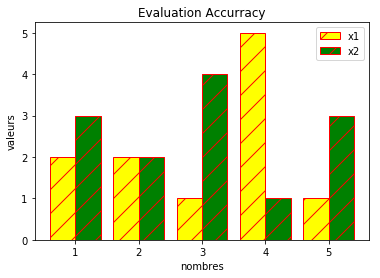

In [14]:
x1 = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 1]
x2 = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5]
bins = [x + 0.5 for x in range(0, 6)]
plt.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['x1', 'x2'],
            histtype = 'bar') # bar est le defaut
plt.ylabel('valeurs')
plt.xlabel('nombres')
plt.title('Evaluation Accurracy')
plt.legend()

0.764
0.86
test accuracy average:  0.8671215218809618
test precision average:  nan
test false positive rate average:  0.09070653860711879


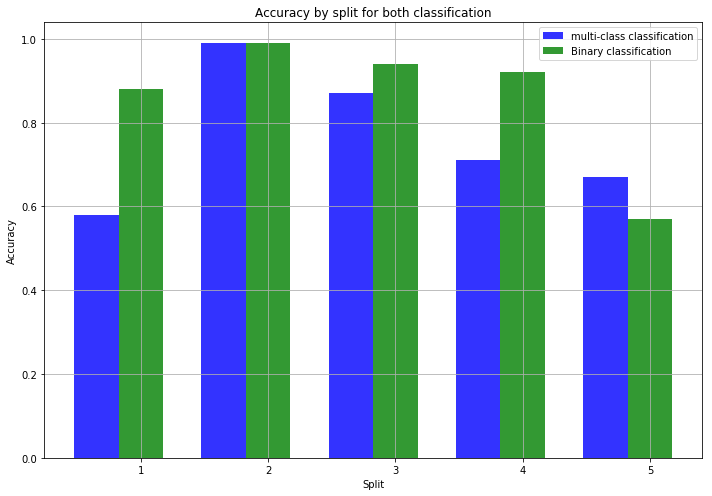

In [28]:
# data to plot
n_groups = 5
accuracy_MC = (0.58, 0.99, 0.87, 0.71, 0.67)
accuracy_BC = (0.88, 0.99, 0.94, 0.92,0.57)
print((0.58+ 0.99+ 0.87+ 0.71+ 0.67)/5)
print((0.88+ 0.99+ 0.94+ 0.92+0.57)/5)
# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy_MC, bar_width,
alpha=opacity,
color='b',
label='multi-class classification')

rects2 = plt.bar(index + bar_width, accuracy_BC, bar_width,
alpha=opacity,
color='g',
label='Binary classification')

plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.title('Accuracy by split for both classification')
plt.xticks(index + bar_width, ('1', '2', '3', '4','5'))
plt.legend()

plt.tight_layout()
plt.grid()

print("test accuracy average: ",accuracy_RF_b/5 )
print("test precision average: ", precision_RF_b/5)
print("test false positive rate average: ",fpr_RF_b/5 )